# Enhance Images using Edges and Contoures

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

## Convert Image to Gray

(-0.5, 860.5, 492.5, -0.5)

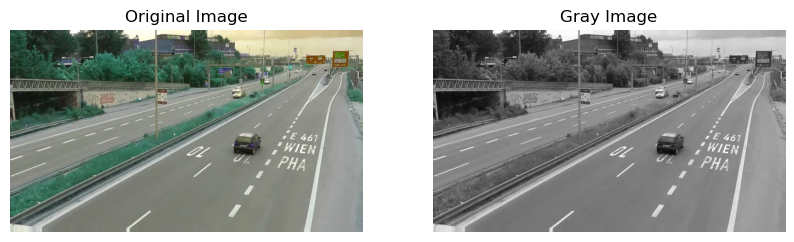

In [2]:
img = cv2.imread("../dataset/frames/train/00012/00012_1560.jpg")
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_gray, cmap='gray')
plt.title('Gray Image')
plt.axis('off')

## Make Canny Edges form Both RGB and Gray

In [3]:
def img_to_edges(img, blur_kernel=(5, 5)):
    img_med = np.median(img)
    img_med_lower = int(max(0, 0.7 * img_med))
    img_med_upper = int(min(255, 1.3 * img_med))
    img_blur = cv2.blur(img, blur_kernel)
    img_edges = cv2.Canny(img_blur, img_med_lower, img_med_upper)
    return img_edges

(-0.5, 860.5, 492.5, -0.5)

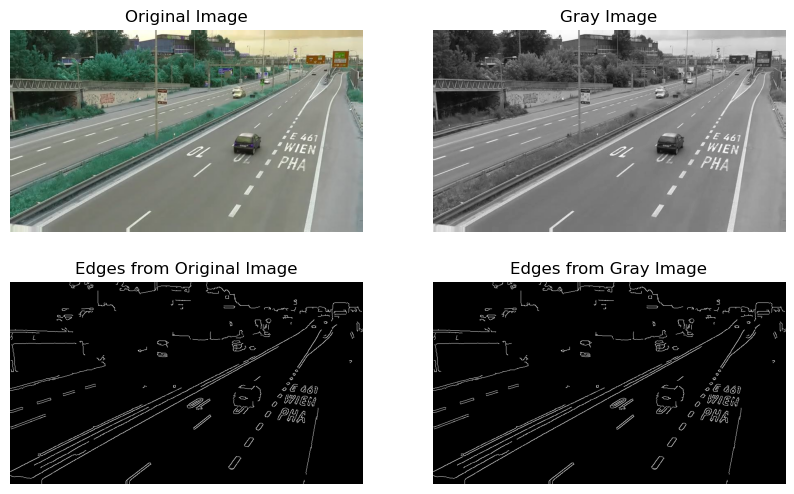

In [4]:
img_edges = img_to_edges(img)
img_edges = img_to_edges(img_gray)


plt.figure(figsize=(10, 6))

plt.subplot(2, 2, 1)
plt.imshow(img)
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(img_gray, cmap='gray')
plt.title('Gray Image')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(img_edges, cmap='gray')
plt.title('Edges from Original Image')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(img_edges, cmap='gray')
plt.title('Edges from Gray Image')
plt.axis('off')

## Make Contours from Edges

In [5]:
def edges_to_contours(edges, color=(255, 255, 255), thickness=3):
    contours, _ = cv2.findContours(
        edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    edges_contours = cv2.drawContours(
        np.zeros_like(edges), contours, -1, color, thickness)

    return edges_contours

(-0.5, 860.5, 492.5, -0.5)

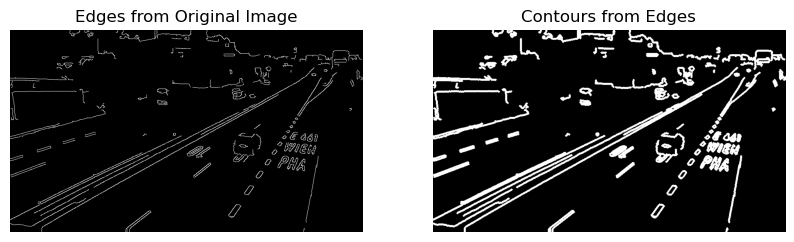

In [6]:
img_edges_contours = edges_to_contours(img_edges)

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.imshow(img_edges, cmap='gray')
plt.title('Edges from Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_edges_contours, cmap='gray')
plt.title('Contours from Edges')
plt.axis('off')

## Resize Contours to Multiple Scales

In [7]:
output_dir = 'output/1/contours'
os.makedirs(output_dir, exist_ok=True)
for perc in [0.4, 0.5, 0.6, 0.7, 0.8]:
    new_shape = tuple(int(v * perc) for v in img_edges_contours.shape)
    img_edges_contours_resized = cv2.resize(img_edges_contours, new_shape[::-1])
    output_path = os.path.join(output_dir, f'resized_{perc:.2f}.jpg')
    cv2.imwrite(output_path, img_edges_contours_resized)

## Apply MorphologyEx on Edges and Draw Contours

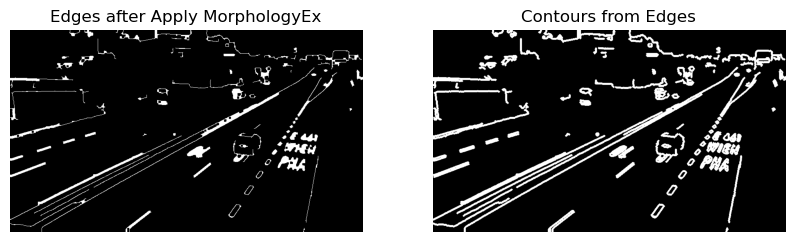

In [8]:
img_edges_morph = cv2.morphologyEx(
    img_edges, cv2.MORPH_CLOSE, np.ones((5, 5), np.uint8))
img_edges_morph_contours = edges_to_contours(img_edges_morph)


plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.imshow(img_edges_morph, cmap='gray')
plt.title('Edges after Apply MorphologyEx')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_edges_contours, cmap='gray')
plt.title('Contours from Edges')
plt.axis('off')

plt.imshow(img_edges_contours, cmap='gray')